[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Fear-Lesson-Plans/blob/master/Lesson-7-12-Cell/D4.ipynb)

# 12 Cell Model of the Amygdala
Now that you know feedback and feedforward inhibition circuits, it's time to put it to the test.




# CHALLENGE
---

Sketch a 10 cell model of the amygdala with 8 PNs(as a triangle) and 2 ITNs(as a circle). Use T to indicate tone and S for shock. Assume both tone and shock make excitatory synapses. Try to implement feedback and feedforward inhibition within your model.

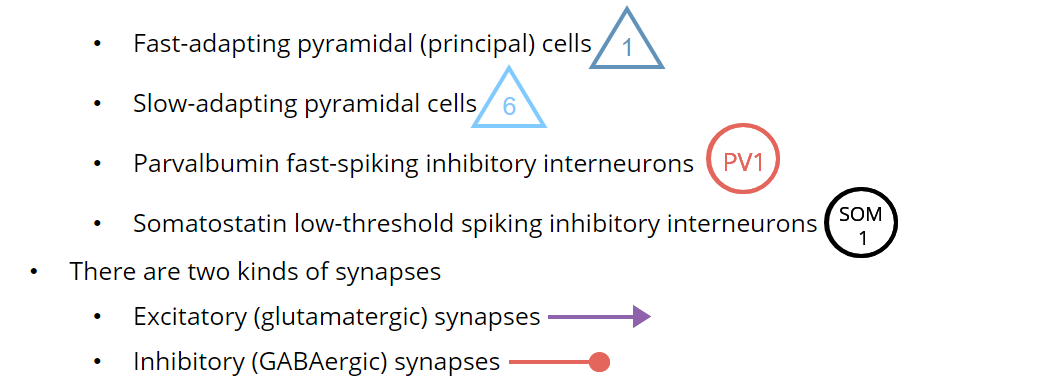

# 12 Cell Model Diagram
Our specific model has 12 cells with 8 PN, 2 PV, and 2 SOM cells. The network has background, tone, and shock connections. The diagram is given below.

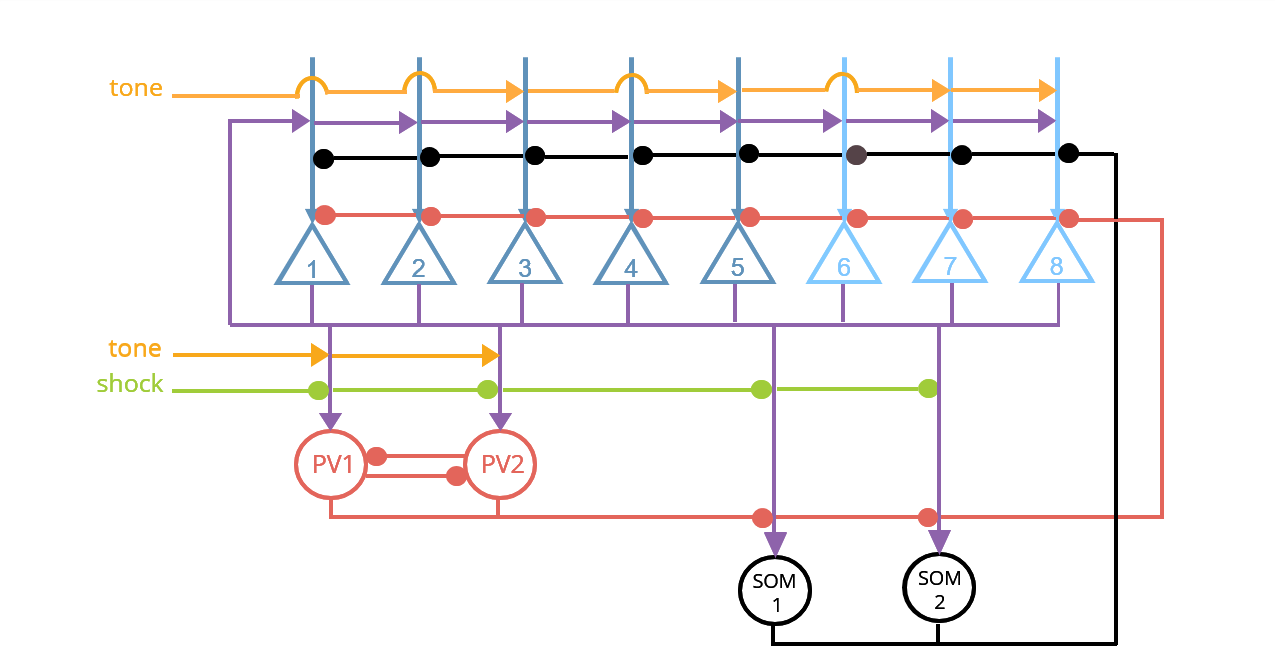

#The Model
Each model run has 3 stages:
*   Sensitization: Tone and shock is given 10 time each separately to get a baseline.
*   Conditioning: Tone is played 10 times, with shock occurring in the last 20% of the tone occurrance.
*   Early Extinction: Tone is played 30 times alone. The difference in the baseline and here will show how much has been learned due to conditioning.

Run the cell below to view runs of the model with different parameters. First 'plot baseline' to see what a normal run looks like and make sure you understand why each neuron has the firing rate it does during each stage of the run.

In [1]:
#@title setup
import os
RunningInCOLAB = 'google.colab' in str(get_ipython())  # checks to see if we are in google colab
if RunningInCOLAB:                                     # installs packages and repo if in colab
    !pip install ipywidgets &> /dev/null
    !pip install neuron &> /dev/null
    !pip install bmtk &> /dev/null

    !git clone https://github.com/cyneuro/Fear-Lesson-Plans &> /dev/null
    %cd Fear-Lesson-Plans/Lesson-7-12-Cell

if(os.path.exists('biophys_components/mechanisms/x86_64')==False):
    %cd biophys_components/mechanisms 
    os.system('nrnivmodl modfiles')
    %cd ../..

/Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms


/Users/gregglickert/opt/anaconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/usr/bin/xcrun
/Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Gfluct_new_exc.mod" "modfiles/modfiles/Gfluct_new_inh.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/MyExp2Sid.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/OLM_IA.mod" "modfiles/modfiles/OLM_Ih.mod" "modfiles/modfiles/OLM_Lca.mod" "modfiles/modfiles/OLM_cat.mod" "modfiles/modfiles/OLM_ccanl.mod" "modfiles/modfiles/OLM_ichan2.mod" "modfiles/modfiles/OLM_nap.mod" "modfiles/modfiles/OLM_sahp.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/bg2pyr.mod" "modfiles/modfiles/bginh.mod" "modfiles/modfiles/ca.mod" 

Translating Ca_HVA.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/Ca_HVA.c
Translating Ca_LVA.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/Ca_LVA.c
Translating CaDynamics.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/CaDynamics.c
Thread Safe
Thread Safe
Thread Safe
Translating Gfluct_new_inh.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/Gfluct_new_inh.c
Translating Ih.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/Ih.c
Translating Gfluct_new_exc.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/Gfluct_new_exc.c
Notice: This mechanism cannot be used with CVODE
Notice:

 -> NMODL ../modfiles/SK.mod
 -> NMODL ../modfiles/bg2pyr.mod
 -> NMODL ../modfiles/bginh.mod
 -> NMODL ../modfiles/ca.mod
 -> NMODL ../modfiles/cad.mod
 -> NMODL ../modfiles/cadyn.mod
 -> NMODL ../modfiles/cal2.mod
 -> NMODL ../modfiles/cal2CA3.mod
 -> NMODL ../modfiles/capool.mod
 -> NMODL ../modfiles/capoolCA3.mod
 -> NMODL ../modfiles/cas.mod
 -> NMODL ../modfiles/cat.mod
 -> NMODL ../modfiles/cav31.mod
 -> NMODL ../modfiles/currentclamp.mod
 -> NMODL ../modfiles/function_TMonitor.mod
 -> NMODL ../modfiles/gabaa.mod
 -> NMODL ../modfiles/gap.mod
 -> NMODL ../modfiles/h.mod
 -> NMODL ../modfiles/hCA3.mod


Translating SK.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/SK.c
Translating bg2pyr.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/bg2pyr.c
Thread Safe
Translating bginh.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/bginh.c
Thread Safe
Notice: scop_random is not thread safe
Translating ca.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/ca.c
Notice: VERBATIM blocks are not thread safe
Notice: This mechanism cannot be used with CVODE
Notice: Assignment to the GLOBAL variable, "tadj", is not thread safe
Translating cad.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/cad.c
Thread Safe
Translating cadyn.mod into /Users/gregglickert/Documents

 -> NMODL ../modfiles/halfgap.mod
 -> NMODL ../modfiles/im.mod
 -> NMODL ../modfiles/imCA3.mod
 -> NMODL ../modfiles/int2intFENG.mod
 -> NMODL ../modfiles/int2pyrFENG.mod
 -> NMODL ../modfiles/int2pyrKIM.mod
 -> NMODL ../modfiles/interD2interD_SOMPV_STFD_new.mod
 -> NMODL ../modfiles/interD2interD_STFD_new.mod
 -> NMODL ../modfiles/interD2pyrD_CR2P_STFD_new.mod
 -> NMODL ../modfiles/interD2pyrD_SOM2P_STFD_new.mod
 -> NMODL ../modfiles/interD2pyrD_STFD_new.mod
 -> NMODL ../modfiles/kadist.mod


Translating im.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/im.c
Translating imCA3.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/imCA3.c
Translating int2intFENG.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/int2intFENG.c
Thread Safe
Thread Safe
Notice: scop_random is not thread safe
Translating int2pyrFENG.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/int2pyrFENG.c
Translating int2pyrKIM.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/int2pyrKIM.c
Notice: scop_random is not thread safe
Notice: scop_random is not thread safe
Translating interD2interD_SOMPV_STFD_new.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson

 -> NMODL ../modfiles/kaprox.mod
 -> NMODL ../modfiles/kca.mod
 -> NMODL ../modfiles/kdrCA3.mod
 -> NMODL ../modfiles/kdrca1.mod
 -> NMODL ../modfiles/kdrca1DA.mod
 -> NMODL ../modfiles/kdrinter.mod
 -> NMODL ../modfiles/kdrinter_WB.mod
 -> NMODL ../modfiles/km.mod
 -> NMODL ../modfiles/kv.mod
 -> NMODL ../modfiles/leak.mod
 -> NMODL ../modfiles/leakCA3.mod
 -> NMODL ../modfiles/leakDA.mod
 -> NMODL ../modfiles/leakinter.mod


Translating kaprox.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/kaprox.c
Thread Safe
Translating kca.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/kca.c
Thread Safe
Translating kdrCA3.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/kdrCA3.c
Thread Safe
Translating kdrca1.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/kdrca1.c
Thread Safe
Translating kdrca1DA.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/kdrca1DA.c
Translating kdrinter.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/kdrinter.c
Thread Safe
Thread Safe
Translating kdrinter_WB.mod into /Users/gregglicke

 -> NMODL ../modfiles/na.mod
 -> NMODL ../modfiles/na12.mod
 -> NMODL ../modfiles/na16.mod
 -> NMODL ../modfiles/na3.mod
 -> NMODL ../modfiles/na3DA.mod
 -> NMODL ../modfiles/nainter.mod
 -> NMODL ../modfiles/nainter_WB.mod
 -> NMODL ../modfiles/nap.mod
 -> NMODL ../modfiles/nap2.mod
 -> NMODL ../modfiles/napCA3.mod
 -> NMODL ../modfiles/nat.mod
 -> NMODL ../modfiles/natCA3.mod
 -> NMODL ../modfiles/pyr2intFENG.mod
 -> NMODL ../modfiles/pyr2intKIM.mod
 -> NMODL ../modfiles/pyr2pyrFENG.mod
 -> NMODL ../modfiles/pyr2pyrKIM.mod
 -> NMODL ../modfiles/pyrD2interD_P2CR_STFD.mod
 -> NMODL ../modfiles/pyrD2interD_P2SOM_STFD.mod
 -> NMODL ../modfiles/pyrD2interD_STFD.mod
 -> NMODL ../modfiles/pyrD2pyrD_STFD_new.mod


Thread Safe
Translating nainter_WB.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/nainter_WB.c
Translating nap.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/nap.c
Thread Safe
Thread Safe
Translating nap2.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/nap2.c
Thread Safe
Translating napCA3.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/napCA3.c
Translating nat.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/nat.c
Thread Safe
Thread Safe
Translating natCA3.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/natCA3.c
Thread Safe
Translating pyr2intFENG.mod into /Users/gregglic

 -> NMODL ../modfiles/sahp.mod
 -> NMODL ../modfiles/sahpCA3.mod
 -> NMODL ../modfiles/sahpNE.mod
 -> NMODL ../modfiles/shock2int.mod
 -> NMODL ../modfiles/shock2pyr.mod
 -> NMODL ../modfiles/synapse_inter2pyr.mod
 -> NMODL ../modfiles/tone2pyr.mod
 -> NMODL ../modfiles/vecevent.mod
 -> NMODL ../modfiles/xtra.mod
 -> NMODL ../modfiles/xtra_imemrec.mod
 -> Compiling CaDynamics.c
 -> Compiling Ca_HVA.c
 -> Compiling Ca_LVA.c


Thread Safe
Thread Safe
Translating shock2int.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/shock2int.c
Notice: scop_random is not thread safe
Translating shock2pyr.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/shock2pyr.c
Translating synapse_inter2pyr.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/synapse_inter2pyr.c
Thread Safe
Thread Safe
Translating tone2pyr.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/tone2pyr.c
Translating vecevent.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell/biophys_components/mechanisms/x86_64/vecevent.c
Notice: VERBATIM blocks are not thread safe
Thread Safe
Translating xtra.mod into /Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Less

 -> Compiling Gfluct_new_exc.c
 -> Compiling Gfluct_new_inh.c
 -> Compiling Ih.c
 -> Compiling Im_v2.c


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
Kd.c:43:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C2x, conflicting with a previous declaration [-Wdeprecated-non-prototype]
         extern double *getarg();
                        ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/oc_ansi.h:49:16: note: conflicting prototype is here
extern double* getarg(int);
               ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
K_P.c:43:18: warning: a function declaration without a prototype i

 -> Compiling K_P.c
 -> Compiling K_T.c
 -> Compiling Kd.c
 -> Compiling Kv2like.c


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
MyExp2Sid.c:42:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C2x, conflicting with a previous declaration [-Wdeprecated-non-prototype]
         extern double *getarg();
                        ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/oc_ansi.h:49:16: note: conflicting prototype is here
extern double* getarg(int);
               ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
Kv3_1.c:43:18: warning: a function declaration without a pr

 -> Compiling Kv3_1.c
 -> Compiling MyExp2Sid.c
 -> Compiling NaTa.c
 -> Compiling NaTs.c


1 warning generated.
2 warnings generated.
1 warning generated.
1 warning generated.
NaV.c:43:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C2x, conflicting with a previous declaration [-Wdeprecated-non-prototype]
         extern double *getarg();
                        ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/oc_ansi.h:49:16: note: conflicting prototype is here
extern double* getarg(int);
               ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
NaV.c:404:17: warning: a function declaration without a prototyp

 -> Compiling NaV.c
 -> Compiling OLM_IA.c
 -> Compiling OLM_Ih.c
 -> Compiling OLM_Lca.c


1 warning generated.
1 warning generated.
1 warning generated.
2 warnings generated.
OLM_cat.c:42:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C2x, conflicting with a previous declaration [-Wdeprecated-non-prototype]
         extern double *getarg();
                        ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/oc_ansi.h:49:16: note: conflicting prototype is here
extern double* getarg(int);
               ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
OLM_ccanl.c:42:18: warning: a function declaration without a

 -> Compiling OLM_cat.c
 -> Compiling OLM_ccanl.c
 -> Compiling OLM_ichan2.c
 -> Compiling OLM_nap.c
/Users/gregglickert/Documents/GitHub/Fear-Lesson-Plans/Lesson-7-12-Cell


OLM_nap.c:44:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C2x, conflicting with a previous declaration [-Wdeprecated-non-prototype]
         extern double *getarg();
                        ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/oc_ansi.h:49:16: note: conflicting prototype is here
extern double* getarg(int);
               ^
/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
#define getarg  hoc_getarg
                ^
1 warning generated.
1 warning generated.
1 warning generated.
Traceback (most recent call last):
  File "/Users/gregglickert/opt/anaconda3/envs/

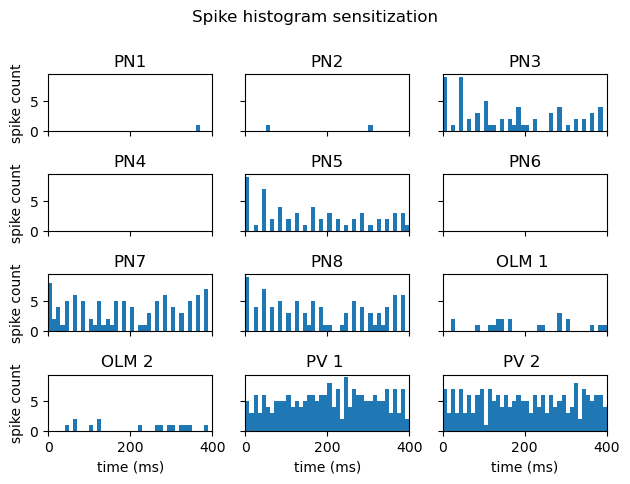

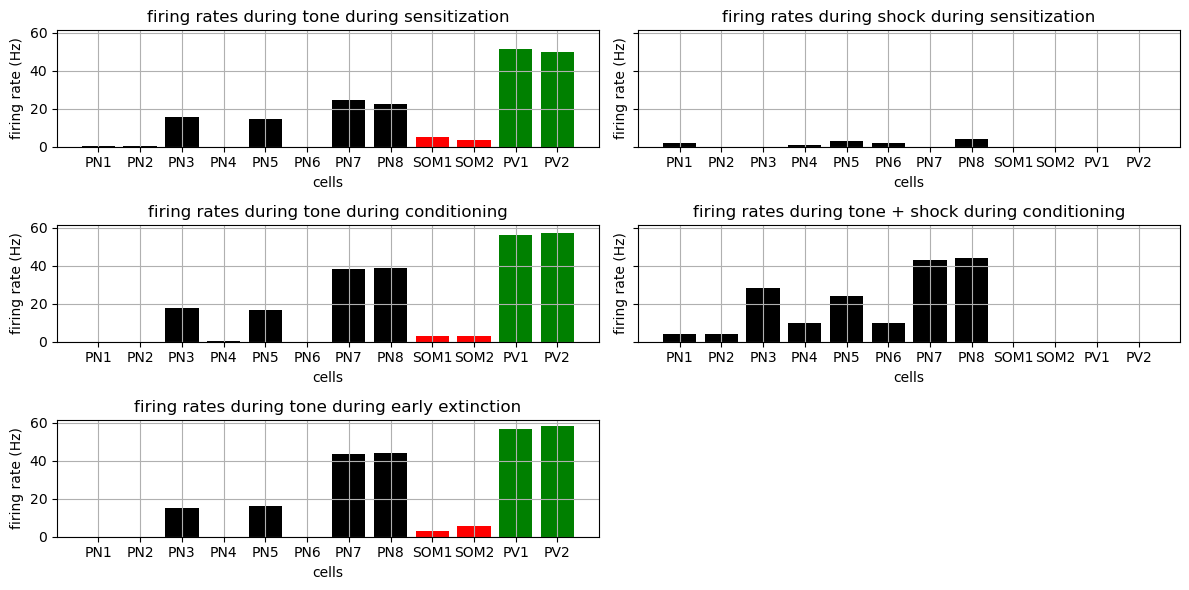

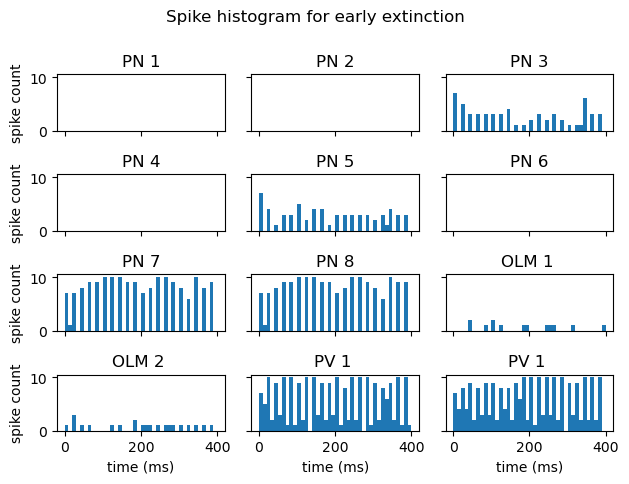

In [2]:
#@title Run Cell to activate model
import os, sys
from io import StringIO

print("Downloading model this will only take a min!")
class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout


from bmtk.builder import NetworkBuilder
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.utils.sim_setup import build_env_bionet
import numpy as np
import sys
import synapses
import random
import warnings

warnings.simplefilter(action='ignore', category=DeprecationWarning)

seed = 967
random.seed(seed)
np.random.seed(seed)

synapses.load()
syn = synapses.syn_params_dicts()

# Initialize our network

net = NetworkBuilder("biophysical")

num_inh = [1]

num_exc = [1]

##################################################################################
###################################BIOPHY#########################################

net.add_nodes(N=5, pop_name='PyrA',
              mem_potential='e',
              model_type='biophysical',
              model_template='hoc:Cell_A',
              morphology=None)

net.add_nodes(N=3, pop_name='PyrC',
              mem_potential='e',
              model_type='biophysical',
              model_template='hoc:Cell_C',
              morphology=None)
net.add_nodes(N=2, pop_name='OLM',
              mem_potential='e',
              model_type='biophysical',
              model_template='hoc:SOM_Cell_old',
              morphology=None)

net.add_nodes(N=2, pop_name='PV',
              mem_potential='e',
              model_type='biophysical',
              model_template='hoc:basket',
              morphology=None)

##################################################################################
###################################External Networks##############################

# print("Internal nodes built")

#print("making {} exc_stim nodes".format(np.sum(num_exc)))

# External excitatory inputs
tone = NetworkBuilder('tone')
tone.add_nodes(N=1,
               pop_name='tone',
               potential='exc',
               model_type='virtual')

#print("making {} inh_stim nodes".format(np.sum(num_inh)))
# External inhibitory inputs
shock = NetworkBuilder('shock')
shock.add_nodes(N=1,
                pop_name='shock',
                potential='exc',
                model_type='virtual')
#backgrounds
backgroundPN_A = NetworkBuilder('bg_pn_a')
backgroundPN_A.add_nodes(N=5,
                   pop_name='tON',
                   potential='exc',
                   model_type='virtual')

backgroundPN_C = NetworkBuilder('bg_pn_c')
backgroundPN_C.add_nodes(N=3,
                   pop_name='tON',
                   potential='exc',
                   model_type='virtual')

backgroundPV = NetworkBuilder('bg_pv')
backgroundPV.add_nodes(N=2,
                   pop_name='tON',
                   potential='exc',
                   model_type='virtual')

backgroundOLM = NetworkBuilder('bg_olm')
backgroundOLM.add_nodes(N=2,
                   pop_name='tON',
                   potential='exc',
                   model_type='virtual')



##################################################################################
###################################Edges##########################################

def one_to_all_shock2OLM(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting shock cell {} to OLM cell {}".format(sid, tid))
    return 1

def one_to_all_shock2PV(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting shock cell {} to PV cell {}".format(sid, tid))
    return 1

def shock2PN(source, target):
    sid = source.node_id
    tid = target.node_id
    if (tid == 0 or tid == 3 or tid == 4 or tid == 6 or tid==7):
        #print("connecting shock cell {} to PN {}".format(sid, tid))
        return 1
    else:
        return 0

def tone2PN(source, target):
    sid = source.node_id
    tid = target.node_id
    if (tid == 2 or tid == 4 or tid == 6 or tid == 7):
        #print("connecting tone cell {} to PN {}".format(sid, tid))
        tmp_nsyn = 1
    else:
        #print("not connecting{}".format(tid))
        tmp_nsyn = 0
    return tmp_nsyn

def tone2PV(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting tone cell {} to PV cell {}".format(sid, tid))
    return 1

def tone2OLM(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting tone cell {} to OLM cell {}".format(sid, tid))
    return 1

def PN2OLM(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting PN cell {} to OLM cell {}".format(sid, tid))
    return 1

def PN2PV(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting PN cell {} to PV cell {}".format(sid, tid))
    return 1

def PV2OLM(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting PV cell {} to OLM cell {}".format(sid, tid))
    return 1

def one_to_one(source, target):
    sid = source.node_id
    tid = target.node_id
    if sid == tid:
        #print("connecting cell {} to {}".format(sid, tid))
        tmp_nsyn = 1
    else:
        return 0

    return tmp_nsyn

def pyr_connection(source, target):
    sid = source.node_id
    tid = target.node_id
    if (sid != tid):
        #print("connecting PN cells {} and {}".format(sid, tid))
        return 1

def PV2PV(source, target):
    sid = source.node_id
    tid = target.node_id
    if (sid != tid):
        #print("connecting PV cell {} to PV {}".format(sid, tid))
        tmp_nsyn = 1
    else:
        return 0
    return tmp_nsyn

def PV2PN(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting PV cells {} to PN cell {}".format(sid, tid))
    return 3

def OLM2PN(source, target):
    sid = source.node_id
    tid = target.node_id
    #print("connecting OLM cells {} to PN cell {}".format(sid, tid))
    return 2

def BG_to_PN_A(source, target):
    sid = source.node_id
    tid = target.node_id
    if sid == tid:
        #print("connecting BG {} to PN_A{}".format(sid,tid))
        tmp_nsyn = 1
    else:
        return 0

    return tmp_nsyn

def BG_to_PN_C(source, target):
    sid = source.node_id
    tid = target.node_id
    tid = (tid-5)
    if sid == tid:
        #print("connecting BG {} to PN_C{}".format(sid,tid))
        tmp_nsyn = 1
    else:
        return 0

    return tmp_nsyn

def BG_to_PV(source, target):
    sid = source.node_id
    tid = target.node_id
    sid = sid + 10
    if sid == tid:
        #print("connecting BG {} to pv{}".format(sid,tid))
        tmp_nsyn = 1
    else:
        return 0

    return tmp_nsyn

def BG_to_OLM(source, target):
    sid = source.node_id
    tid = target.node_id
    sid = sid + 8
    if sid == tid:
        #print("connecting BG {} to olm{}".format(sid,tid))
        tmp_nsyn = 1
    else:
        return 0

    return tmp_nsyn

net.add_edges(source=shock.nodes(), target=net.nodes(pop_name='OLM'),
              connection_rule=one_to_all_shock2OLM,
              syn_weight=1.0,
              target_sections=['basal'],
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='shock2INT12.json',
              model_template=syn['shock2INT12.json']['level_of_detail'])

net.add_edges(source=shock.nodes(), target=net.nodes(pop_name='PV'),
              connection_rule=one_to_all_shock2PV,
              syn_weight=1.0,
              target_sections=['basal'],
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='shock2INT12.json',
              model_template=syn['shock2INT12.json']['level_of_detail'])


# Create connections between Tone --> Pyr cells
conn = net.add_edges(source=tone.nodes(), target=net.nodes(pop_name=['PyrA', 'PyrC']),
              connection_rule=tone2PN,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='tone2PN.json',
              model_template=syn['tone2PN.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(2, 0.9), dtypes=[np.int32, np.float64]) # places syn on apic at 0.9

#net.add_edges(source=tone.nodes(), target=net.nodes(pop_name='OLM'),
#              connection_rule=tone2OLM,
#              syn_weight=3.0,
#              target_sections=['somatic'],
#              delay=0.1,
#              distance_range=[10.0, 11.0],
#              dynamics_params='tone2INT.json',
#              model_template=syn['tone2INT.json']['level_of_detail'])

conn = net.add_edges(source=tone.nodes(), target=net.nodes(pop_name='PV'),
              connection_rule=tone2PV,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='tone2INT.json',
              model_template=syn['tone2INT.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(1, 0.9), dtypes=[np.int32, np.float64]) # places syn on basal at 0.9

# Create connections between Pyr --> Pyr cells
conn = net.add_edges(source=net.nodes(pop_name='PyrA'), target=net.nodes(pop_name=['PyrA', 'PyrC']),
              connection_rule=pyr_connection,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PN2PN.json',
              model_template=syn['PN2PN.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(2, 0.9), dtypes=[np.int32, np.float64]) # places syn on apic at 0.9

conn = net.add_edges(source=net.nodes(pop_name='PyrC'), target=net.nodes(pop_name=['PyrA', 'PyrC']),
              connection_rule=pyr_connection,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PN2PN.json',
              model_template=syn['PN2PN.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(2, 0.9), dtypes=[np.int32, np.float64]) # places syn on apic at 0.9


conn = net.add_edges(source=net.nodes(pop_name=['PyrA', 'PyrC']), target=net.nodes(pop_name='OLM'),
              connection_rule=PN2OLM,
              syn_weight=1,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PN2SOM.json',
              model_template=syn['PN2SOM.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(1, 0.9), dtypes=[np.int32, np.float64]) # places syn on basal at 0.9

# Create connections between Pyr --> PV cells
conn = net.add_edges(source=net.nodes(pop_name=['PyrA', 'PyrC']), target=net.nodes(pop_name='PV'),
              connection_rule=PN2PV,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PN2PV.json',
              model_template=syn['PN2PV.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(1, 0.9), dtypes=[np.int32, np.float64]) # places syn on basal at 0.9


# Create connections Int --> Int cells

net.add_edges(source=net.nodes(pop_name='PV'), target=net.nodes(pop_name='PV'),
              connection_rule=PV2PV,
              syn_weight=1.0,
              target_sections=['somatic'],
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PV2PV.json',
              model_template=syn['PV2PV.json']['level_of_detail'])

net.add_edges(source=net.nodes(pop_name='PV'), target=net.nodes(pop_name='OLM'),
              connection_rule=PV2OLM,
              syn_weight=1.0,
              target_sections=['somatic'],
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PV2SOM.json',
              model_template=syn['PV2SOM.json']['level_of_detail'])

# Create connections Int --> Pyr cells
net.add_edges(source=net.nodes(pop_name='PV'), target=net.nodes(pop_name=['PyrA', 'PyrC']),
              connection_rule=PV2PN,
              syn_weight=1.0,
              target_sections=['somatic'],
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='PV2PN.json',
              model_template=syn['PV2PN.json']['level_of_detail'])

conn = net.add_edges(source=net.nodes(pop_name='OLM'), target=net.nodes(pop_name=['PyrA', 'PyrC']),
              connection_rule=OLM2PN,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='SOM2PN.json',
              model_template=syn['SOM2PN.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(2, 0.6), dtypes=[np.int32, np.float64]) # places syn on apic at 0.6

conn = net.add_edges(source=backgroundPN_A.nodes(), target=net.nodes(pop_name='PyrA'),
              connection_rule=BG_to_PN_A,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='BG2PNA.json',
              model_template=syn['BG2PNA.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(2, 0.9), dtypes=[np.int32, np.float64]) # places syn on apic at 0.9

conn = net.add_edges(source=backgroundPN_C.nodes(), target=net.nodes(pop_name='PyrC'),
              connection_rule=BG_to_PN_C,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='BG2PNC.json',
              model_template=syn['BG2PNC.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(2, 0.9), dtypes=[np.int32, np.float64]) # places syn on apic at 0.9

conn = net.add_edges(source=backgroundOLM.nodes(), target=net.nodes(pop_name='OLM'),
              connection_rule=BG_to_OLM,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='BG2OLM.json',
              model_template=syn['BG2OLM.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(1, 0.9), dtypes=[np.int32, np.float64]) # places syn on basal at 0.9

conn = net.add_edges(source=backgroundPV.nodes(), target=net.nodes(pop_name='PV'),
              connection_rule=BG_to_PV,
              syn_weight=1.0,
              delay=0.1,
              distance_range=[-10000, 10000],
              dynamics_params='BG2PV.json',
              model_template=syn['BG2PV.json']['level_of_detail'])
conn.add_properties(['sec_id', 'sec_x'], rule=(1, 0.9), dtypes=[np.int32, np.float64]) # places syn on basal at 0.9

# Build and save our networks

net.build()
net.save(output_dir='network')

tone.build()
tone.save_nodes(output_dir='network')

shock.build()
shock.save_nodes(output_dir='network')

backgroundPN_A.build()
backgroundPN_A.save_nodes(output_dir='network')

backgroundPN_C.build()
backgroundPN_C.save_nodes(output_dir='network')

backgroundPV.build()
backgroundPV.save_nodes(output_dir='network')

backgroundOLM.build()
backgroundOLM.save_nodes(output_dir='network')

t_sim = 232500  # early extinction time is 232500 sensitization time is 40000
#print("stim time is set to %s" % t_sim)


#build_env_bionet(base_dir='./',
#                 network_dir='./network',
#                 tstop=t_sim, dt=0.1,
#                 report_vars=['v'],
#                 spikes_inputs=[('tone', './12_cell_inputs/tone_spikes.csv'),
#                                ('shock', './12_cell_inputs/shock_spikes.csv'),
#                                ('bg_pn', '12_cell_inputs/bg_pn_spikes.h5'),
#                                ('bg_pv', '12_cell_inputs/bg_pv_spikes.h5'),
#                                ('bg_olm', '12_cell_inputs/bg_olm_spikes.h5')],
#                 components_dir='biophys_components',
#                 config_file='config.json',
#                 compile_mechanisms=False)

psg = PoissonSpikeGenerator(population='tone')
psg.add(node_ids=range(1),  # need same number as cells
        firing_rate=2,    # 1 spike every 1 second Hz
        times=(0.0, t_sim/1000))  # time is in seconds for some reason
psg.to_sonata('12_cell_inputs/tone_background.h5')

#print('Number of background spikes for tone: {}'.format(psg.n_spikes()))

psg = PoissonSpikeGenerator(population='bg_pn_a')
psg.add(node_ids=range(5),  # need same number as cells
        firing_rate=6,    # 1 spike every 1 second Hz
        times=(0.0, t_sim/1000))  # time is in seconds for some reason
psg.to_sonata('12_cell_inputs/bg_pn_a_spikes.h5')

#print('Number of background spikes for PN_A: {}'.format(psg.n_spikes()))

psg = PoissonSpikeGenerator(population='bg_pn_c')
psg.add(node_ids=range(3),  # need same number as cells
        firing_rate=2,    # 1 spike every 1 second Hz
        times=(0.0, t_sim/1000))  # time is in seconds for some reason
psg.to_sonata('12_cell_inputs/bg_pn_c_spikes.h5')

#print('Number of background spikes for PN_C: {}'.format(psg.n_spikes()))


psg = PoissonSpikeGenerator(population='bg_pv')
psg.add(node_ids=range(2),  # need same number as cells
        firing_rate=7.7,    # 8 spikes every 1 second Hz
        times=(0.0, t_sim/1000))  # time is in seconds for some reason
psg.to_sonata('12_cell_inputs/bg_pv_spikes.h5')

#print('Number of background spikes for PV: {}'.format(psg.n_spikes()))

psg = PoissonSpikeGenerator(population='bg_olm')
psg.add(node_ids=range(2),  # need same number as cells
        firing_rate=8.5,    # 8 spikes every 1 second Hz
        times=(0.0, t_sim/1000))  # time is in seconds for some reason
psg.to_sonata('12_cell_inputs/bg_olm_spikes.h5')

#print('Number of background spikes for OLMM: {}'.format(psg.n_spikes()))

from bmtk.analyzer.spike_trains import to_dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


def generate_plots(path):
    f = h5py.File(path)
    df = pd.DataFrame(
        {'node_ids': f['spikes']['biophysical']['node_ids'], 'timestamps': f['spikes']['biophysical']['timestamps']})
    #df0 = df.loc[df['node_ids'] == 0]
    #df0.to_csv("spikes.csv")
    node_spike_array = []

    ##tone sense
    def tone_response(node_spike_array):
        node_num = 0

        while(node_num <= 11):
            df0 = df.loc[df['node_ids'] == node_num]

            x0 = df0['timestamps'].tolist()
            first_trial = []
            second_trial = []
            third_trial = []
            fourth_trial = []
            fifth_trial = []
            sixth_trial = []
            seventh_trial = []
            eighth_trial = []
            ninth_trial = []
            tenth_trial = []

            for i in range(len(x0)):
                if (x0[i] >= 0 and x0[i] <= 400):
                    first_trial.append(x0[i])
                if (x0[i] >= 4000 and x0[i] <= 4400):
                    second_trial.append(x0[i])
                if (x0[i] >= 8000 and x0[i] <= 8400):
                    third_trial.append(x0[i])
                if (x0[i] >= 12000 and x0[i] <= 12400):
                    fourth_trial.append(x0[i])
                if (x0[i] >= 16000 and x0[i] <= 16400):
                    fifth_trial.append(x0[i])
                if (x0[i] >= 20000 and x0[i] <= 20400):
                    sixth_trial.append(x0[i])
                if (x0[i] >= 24000 and x0[i] <= 24400):
                    seventh_trial.append(x0[i])
                if (x0[i] >= 28000 and x0[i] <= 28400):
                    eighth_trial.append(x0[i])
                if (x0[i] >= 32000 and x0[i] <= 32400):
                    ninth_trial.append(x0[i])
                if (x0[i] >= 36000 and x0[i] <= 36400):
                    tenth_trial.append(x0[i])

            for i in range(len(second_trial)):
                second_trial[i] -= 4000
            for i in range(len(third_trial)):
                third_trial[i] -= 8000
            for i in range(len(fourth_trial)):
                fourth_trial[i] -= 12000
            for i in range(len(fifth_trial)):
                fifth_trial[i] -= 16000
            for i in range(len(sixth_trial)):
                sixth_trial[i] -= 20000
            for i in range(len(seventh_trial)):
                seventh_trial[i] -= 24000
            for i in range(len(eighth_trial)):
                eighth_trial[i] -= 28000
            for i in range(len(ninth_trial)):
                ninth_trial[i] -= 32000
            for i in range(len(tenth_trial)):
                tenth_trial[i] -= 36000

            final_array = np.concatenate((first_trial, second_trial, third_trial, fourth_trial,
                                          fifth_trial, sixth_trial, seventh_trial, eighth_trial,
                                          ninth_trial, tenth_trial))

            node_spike_array.append(final_array)

            node_num = node_num+1

    def find_bins(array, width):
        try:
            minimmum = np.min(array)
            maximmum = np.max(array)
            bound_min = -1.0 * (minimmum % width - minimmum)
            bound_max = maximmum - maximmum % width + width
            n = int((bound_max - bound_min) / width) + 1
            bins = np.linspace(bound_min, bound_max, n)
        except:
            bins = 10
        return bins

    def set_up_graphs_sense():
        fig, axs = plt.subplots(4, 3, sharey=True, tight_layout=True, sharex=True)
        fig.suptitle('Spike histogram sensitization', y=1)

        i = 0
        column_cnt = 0
        row_cnt = 0

        while (i < 12):
            bins = find_bins(node_spike_array[i], 10)

            axs[row_cnt, column_cnt].hist(x=node_spike_array[i], bins=bins)
            axs[row_cnt, column_cnt].set_title('PN' + str(i + 1))
            if (i == 8):
                axs[row_cnt, column_cnt].set_title('OLM 1 ')
            if (i == 9):
                axs[row_cnt, column_cnt].set_title('OLM 2 ')
            if (i == 10):
                axs[row_cnt, column_cnt].set_title('PV 1 ')
            if (i == 11):
                axs[row_cnt, column_cnt].set_title('PV 2 ')
            # axs[row_cnt, column_cnt].ylabel("spikes")
            # axs[row_cnt, column_cnt].xlabel('ms')

            axs[row_cnt, column_cnt].set_xlim([0, 400])

            column_cnt = column_cnt + 1
            if (column_cnt > 2):
                column_cnt = 0
                row_cnt = row_cnt + 1

            i = i + 1

        plt.setp(axs[-1, :], xlabel='time (ms)')
        plt.setp(axs[:, 0], ylabel='spike count')
        plt.show()

    def spike_freq_bar_tone(axs):
        hz = []
        for i in range(12):
            hz.append(((len(node_spike_array[i]))/0.4)/10) # calculates firing rate in Hz
        x = [0,1,2,3,4,5,6,7,8,9,10,11]
        cells = ["PN1", "PN2", "PN3", "PN4", "PN5", "PN6", "PN7", "PN8", "SOM1", "SOM2", "PV1", "PV2"]
        axs.set_xticklabels(cells)
        axs.bar(height=hz,x=cells,color=['black', 'black', 'black', 'black', 'black', 'black','black', 'black',
                                          'red', 'red', 'green', 'green'])
        axs.set_title("firing rates during tone during sensitization")
        axs.set_xlabel("cells")
        axs.set_ylabel("firing rate (Hz)")
        axs.grid()
        return axs
        plt.show()

    #shock sense
    def shock_response(node_spike_array):
        node_num = 0

        while(node_num <= 11):
            df0 = df.loc[df['node_ids'] == node_num]

            x0 = df0['timestamps'].tolist()
            first_trial = []
            second_trial = []
            third_trial = []
            fourth_trial = []
            fifth_trial = []
            sixth_trial = []
            seventh_trial = []
            eighth_trial = []
            ninth_trial = []
            tenth_trial = []

            for i in range(len(x0)):
                if (x0[i] >= 1750 and x0[i] <= 1850):
                    first_trial.append(x0[i])
                if (x0[i] >= 5750 and x0[i] <= 5850):
                    second_trial.append(x0[i])
                if (x0[i] >= 9750 and x0[i] <= 9850):
                    third_trial.append(x0[i])
                if (x0[i] >= 13750 and x0[i] <= 13850):
                    fourth_trial.append(x0[i])
                if (x0[i] >= 17750 and x0[i] <= 17850):
                    fifth_trial.append(x0[i])
                if (x0[i] >= 21750 and x0[i] <= 21850):
                    sixth_trial.append(x0[i])
                if (x0[i] >= 25750 and x0[i] <= 25850):
                    seventh_trial.append(x0[i])
                if (x0[i] >= 29750 and x0[i] <= 29850):
                    eighth_trial.append(x0[i])
                if (x0[i] >= 33750 and x0[i] <= 33850):
                    ninth_trial.append(x0[i])
                if (x0[i] >= 37750 and x0[i] <= 37850):
                    tenth_trial.append(x0[i])
            """
            for i in range(len(second_trial)):
                second_trial[i] -= 5750
            for i in range(len(third_trial)):
                third_trial[i] -= 9750
            for i in range(len(fourth_trial)):
                fourth_trial[i] -= 13750
            for i in range(len(fifth_trial)):
                fifth_trial[i] -=
            for i in range(len(sixth_trial)):
                sixth_trial[i] -= 25750
            for i in range(len(seventh_trial)):
                seventh_trial[i] -= 29750
            for i in range(len(eighth_trial)):
                eighth_trial[i] -= 33750
            for i in range(len(ninth_trial)):
                ninth_trial[i] -= 32000
            for i in range(len(tenth_trial)):
                tenth_trial[i] -= 36000
            """

            final_array = np.concatenate((first_trial, second_trial, third_trial, fourth_trial,
                                          fifth_trial, sixth_trial, seventh_trial, eighth_trial,
                                          ninth_trial, tenth_trial))

            node_spike_array.append(final_array)

            node_num = node_num+1

    def spike_freq_bar_shock(shock_response_arr, axes):
        hz = []
        for i in range(12):
            hz.append(((len(shock_response_arr[i]))/0.1)/10) # calculates firing rate in Hz

        #print(shock_response_arr[9])
        x = [0,1,2,3,4,5,6,7,8,9,10,11]
        cells = ["PN1", "PN2", "PN3", "PN4", "PN5", "PN6", "PN7", "PN8", "SOM1", "SOM2", "PV1", "PV2"]
        axes.set_xticklabels(cells)
        axes.bar(height=hz,x=cells,color=['black', 'black', 'black', 'black', 'black', 'black','black', 'black',
                                          'red', 'red', 'green', 'green'])
        axes.set_title("firing rates during shock during sensitization")
        axes.set_xlabel("cells")
        axes.set_ylabel("firing rate (Hz)")
        axes.grid()
        return axes


    ## tone during cond
    def tone_during_cond(node_spike_array, axes):
        total_spikes = []
        timestamp = 40000
        node_num = 0
        while(node_num <= 12):
            df0 = df.loc[df['node_ids'] == node_num]
            df0.sort_values(by=['timestamps'])
            x0 = df0['timestamps'].tolist()
            trial_spikes = []
            i = 0
            while(i < 10):
                for j in range(len(x0)):
                    if(x0[j] >= timestamp+(i*4000) and x0[j] <= timestamp+(i*4000+400)):
                        value = (x0[j]-(i*4000) - timestamp)
                        trial_spikes.append(value)

            #should go through all 30 trials and get every value and condense them
                i = i+1

            # should create a list of lists 12 of them each one being a node
            node_spike_array.append(trial_spikes)
            node_num = node_num+1

        hz = []
        for i in range(12):
            hz.append(((len(node_spike_array[i]))/0.4)/10) # calculates firing rate in Hz

        x = [0,1,2,3,4,5,6,7,8,9,10,11]
        cells = ["PN1", "PN2", "PN3", "PN4", "PN5", "PN6", "PN7", "PN8", "SOM1", "SOM2", "PV1", "PV2"]
        axes.set_xticklabels(cells)
        axes.bar(height=hz, x=cells, color=['black', 'black', 'black', 'black', 'black', 'black','black', 'black',
                                          'red', 'red', 'green', 'green'])
        axes.set_title("firing rates during tone during conditioning")
        axes.set_xlabel("cells")
        axes.set_ylabel("firing rate (Hz)")
        axes.grid()
        return axes

    def shock_during_cond(node_spike_array, axes):
        total_spikes = []
        timestamp = 40000
        node_num = 0
        while(node_num <= 12):
            df0 = df.loc[df['node_ids'] == node_num]
            df0.sort_values(by=['timestamps'])
            x0 = df0['timestamps'].tolist()
            trial_spikes = []
            i = 0
            while(i < 10):
                for j in range(len(x0)):
                    if(x0[j] >= timestamp+(i*4000+400) and x0[j] <= timestamp+(i*4000+500)):
                        value = (x0[j]-(i*4000) - timestamp)
                        trial_spikes.append(value)

            #should go through all 30 trials and get every value and condense them
                i = i+1

            # should create a list of lists 12 of them each one being a node
            node_spike_array.append(trial_spikes)
            node_num = node_num+1

        hz = []
        for i in range(12):
            hz.append(((len(node_spike_array[i]))/0.1)/10) # calculates firing rate in Hz

        x = [0,1,2,3,4,5,6,7,8,9,10,11]
        cells = ["PN1", "PN2", "PN3", "PN4", "PN5", "PN6", "PN7", "PN8", "SOM1", "SOM2", "PV1", "PV2"]
        axes.set_xticklabels(cells)
        axes.bar(height=hz, x=cells, color=['black', 'black', 'black', 'black', 'black', 'black','black', 'black',
                                          'red', 'red', 'green', 'green'])
        axes.set_title("firing rates during tone + shock during conditioning")
        axes.set_xlabel("cells")
        axes.set_ylabel("firing rate (Hz)")
        axes.grid()
        return axes


    def create_arrays_extinction_early(node_spike_array):
        total_spikes = []
        timestamp = 116000
        node_num = 0
        while(node_num <= 12):
            df0 = df.loc[df['node_ids'] == node_num]
            df0.sort_values(by=['timestamps'])
            x0 = df0['timestamps'].tolist()
            trial_spikes = []
            i = 0
            while(i < 10):
                for j in range(len(x0)):
                    if(x0[j] >= timestamp+(i*4000) and x0[j] <= timestamp+(i*4000+400)):
                        value = (x0[j]-(i*4000) - timestamp)
                        trial_spikes.append(value)

            #should go through all 30 trials and get every value and condense them
                i = i+1

            # should create a list of lists 12 of them each one being a node
            node_spike_array.append(trial_spikes)
            node_num = node_num+1
        #print(total_spikes)
        #node_spike_array = total_spikes
        #print(node_spike_array)

    def set_up_graphs_EE():
        fig, axs = plt.subplots(4, 3, sharey=True, tight_layout=True, sharex=True)
        fig.suptitle('Spike histogram for early extinction', y=1)

        i = 0
        column_cnt = 0
        row_cnt = 0

        while (i < 12):
            bins = find_bins(extinction_array[i], 10)

            axs[row_cnt, column_cnt].hist(x=extinction_array[i], bins=bins)
            axs[row_cnt, column_cnt].set_title('PN ' + str(i + 1))
            if (i == 8):
                axs[row_cnt, column_cnt].set_title('OLM 1 ')
            if (i == 9):
                axs[row_cnt, column_cnt].set_title('OLM 2 ')
            if (i == 10):
                axs[row_cnt, column_cnt].set_title('PV 1 ')
            if (i == 11):
                axs[row_cnt, column_cnt].set_title('PV 1 ')
            # axs[row_cnt, column_cnt].ylabel("spikes")
            # axs[row_cnt, column_cnt].xlabel('ms')

            # axs[row_cnt, column_cnt].set_xlim([0,400])

            column_cnt = column_cnt + 1
            if (column_cnt > 2):
                column_cnt = 0
                row_cnt = row_cnt + 1

            i = i + 1

        plt.setp(axs[-1, :], xlabel='time (ms)')
        plt.setp(axs[:, 0], ylabel='spike count')

    def tone_during_EE(spike_array, axs):
        hz = []
        #print(spike_array)
        for i in range(12):
            hz.append(((len(spike_array[i])) / 0.4) / 10)  # calculates firing rate in Hz
        x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
        cells = ["PN1", "PN2", "PN3", "PN4", "PN5", "PN6", "PN7", "PN8", "SOM1", "SOM2", "PV1", "PV2"]
        axs.set_xticklabels(cells)
        axs.bar(height=hz, x=cells,color=['black', 'black', 'black', 'black', 'black', 'black','black', 'black',
                                          'red', 'red', 'green', 'green'])
        axs.set_title("firing rates during tone during early extinction")
        axs.set_xlabel("cells")
        axs.set_ylabel("firing rate (Hz)")
        axs.grid()
        return axs


    tone_response(node_spike_array)

    set_up_graphs_sense()
    fig, axs = plt.subplots(3,2, sharex=False,sharey=True, tight_layout=True, figsize=(12,6))
    spike_freq_bar_tone(axs[0,0])
    shock_arr = []
    shock_response(shock_arr)
    spike_freq_bar_shock(shock_arr, axs[0,1])
    tone_cond = []
    tone_during_cond(tone_cond, axs[1,0])
    shock_cond = []
    shock_during_cond(shock_cond, axs[1,1])
    fig.delaxes(axs[2][1])


    #EE stuff
    extinction_array = []
    create_arrays_extinction_early(extinction_array)
    tone_during_EE(extinction_array,axs[2,0])
    plt.show()
    set_up_graphs_EE()
    plt.show()

from ipywidgets import widgets, HBox, VBox
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from IPython.display import clear_output
from IPython.utils import io
import os, sys
import json
from bmtk.simulator import bionet
import numpy as np
import warnings
import random
from io import StringIO
import synapses
from neuron import h

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

slider1 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="PN_input")
#Create your button.
button1 = widgets.Button(description="Generate")
output1 = widgets.Output()
slider2 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="PV_input")
#Create your button.
button2 = widgets.Button(description="Generate")
output2 = widgets.Output()
button3 = widgets.Button(description="run_model")

slider4 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="PN2PV")
#Create your button.
button4 = widgets.Button(description="Edit")
output4 = widgets.Output()

slider5 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="PV2PN")
#Create your button.
button5 = widgets.Button(description="Edit")
output5 = widgets.Output()

slider6 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="SOM_input")
#Create your button.
button6 = widgets.Button(description="Generate")
output6 = widgets.Output()

slider7 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="SOM2PN")
#Create your button.
button7 = widgets.Button(description="Edit")
output7 = widgets.Output()


#function to handle input.
def gen_bg_pn(btn):
    clear_output()
    output1.clear_output()
    return_value = slider1.value
    os.remove('12_cell_inputs/bg_pn_c_spikes.h5')
    if return_value != 0:
        psg = PoissonSpikeGenerator(population='bg_pn_c')
        psg.add(node_ids=range(1),  # need same number as cells
            firing_rate=return_value,    # 1 spike every 1 second Hz
            times=(0.0, 40000/1000))  # time is in seconds for some reason
        psg.to_sonata('12_cell_inputs/bg_pn_c_spikes.h5')
    else:
        psg = PoissonSpikeGenerator(population='bg_pn_c')
        psg.add(node_ids=range(1),  # need same number as cells
            firing_rate=0.00001,    # 1 spike every 1 second Hz
            times=(0.0, 40000/1000))  # time is in seconds for some reason
        psg.to_sonata('12_cell_inputs/bg_pn_c_spikes.h5')
    print('Generated background of PN at : {} Hz'.format(return_value))
    display(ui)
    #with output1:
        #print(return_value)
def gen_bg_pv(btn):
    clear_output()
    output2.clear_output()
    return_value = slider2.value
    os.remove('12_cell_inputs/bg_pv_spikes.h5')
    if return_value != 0:
        psg = PoissonSpikeGenerator(population='bg_pv')
        psg.add(node_ids=range(1),  # need same number as cells
            firing_rate=return_value,    # 1 spike every 1 second Hz
            times=(0.0, 40000/1000))  # time is in seconds for some reason
        psg.to_sonata('12_cell_inputs/bg_pv_spikes.h5')
    else:
        psg = PoissonSpikeGenerator(population='bg_pv')
        psg.add(node_ids=range(1),  # need same number as cells
            firing_rate=0.00001,    # 1 spike every 1 second Hz
            times=(0.0, 40000/1000))  # time is in seconds for some reason
        psg.to_sonata('12_cell_inputs/bg_pv_spikes.h5')
    print('Generated background of PV at : {} Hz'.format(return_value))
    display(ui)

def gen_bg_olm(btn):
    clear_output()
    output6.clear_output()
    return_value = slider6.value
    os.remove('12_cell_inputs/bg_olm_spikes.h5')
    if return_value != 0:
        psg = PoissonSpikeGenerator(population='bg_olm')
        psg.add(node_ids=range(1),  # need same number as cells
            firing_rate=return_value,    # 1 spike every 1 second Hz
            times=(0.0, 40000/1000))  # time is in seconds for some reason
        psg.to_sonata('12_cell_inputs/bg_olm_spikes.h5')
    else:
        psg = PoissonSpikeGenerator(population='bg_olm')
        psg.add(node_ids=range(1),  # need same number as cells
            firing_rate=0.000001,    # 1 spike every 1 second Hz
            times=(0.0, 40000/1000))  # time is in seconds for some reason
        psg.to_sonata('12_cell_inputs/bg_olm_spikes.h5')
    print('Generated background of OLM at : {} Hz'.format(return_value))
    display(ui)

def change_PN2PV(btn):
    clear_output()
    output4.clear_output()
    return_value = slider4.value
    with open('biophys_components/synaptic_models/PN2PV.json', 'r+') as f:
        data = json.load(f)
        data['initW'] = return_value # <--- edit `initW` value.
        f.seek(0)        # <--- should reset file position to the beginning.
        json.dump(data, f, indent=4)
        f.truncate()     # remove remaining part
        print("Changed PN2PV synaptic weight to {}".format(return_value))
    display(ui)


def change_PV2PN(btn):
    clear_output()
    output5.clear_output()
    return_value = slider5.value
    with open('biophys_components/synaptic_models/PV2PN.json', 'r+') as f:
        data = json.load(f)
        data['initW'] = return_value # <--- edit `initW` value.
        f.seek(0)        # <--- should reset file position to the beginning.
        json.dump(data, f, indent=4)
        f.truncate()     # remove remaining part
        print("Changed PV2PN synaptic weight to {}".format(return_value))
    display(ui)

def change_OLM2PN(btn):
    clear_output()
    output7.clear_output()
    return_value = slider7.value
    with open('biophys_components/synaptic_models/SOM2PN.json', 'r+') as f:
        data = json.load(f)
        data['initW'] = return_value # <--- edit `initW` value.
        f.seek(0)        # <--- should reset file position to the beginning.
        json.dump(data, f, indent=4)
        f.truncate()     # remove remaining part
        print("Changed SOM2PN synaptic weight to {}".format(return_value))
    display(ui)

button1.on_click(gen_bg_pn)
button2.on_click(gen_bg_pv)
button4.on_click(change_PN2PV)
button5.on_click(change_PV2PN)
button6.on_click(gen_bg_olm)
button7.on_click(change_OLM2PN)
##do the same thing but change the weight in the json file but opening it and changing it might be a bitch but idk how else
model_ran = False
def run_model(*args):
    clear_output()
    with Capturing() as output:
        synapses.load()
        h.nrnmpi_init()
        pc = h.ParallelContext()  # object to access MPI methods
        MPI_size = int(pc.nhost())
        MPI_rank = int(pc.id())


        config_file = 'simulation_config.json'



        conf = bionet.Config.from_json(config_file, validate=True);
        conf.build_env();

        graph = bionet.BioNetwork.from_config(conf);
        sim = bionet.BioSimulator.from_config(conf, network=graph);

        cells = graph.get_local_cells();

        sim.run();

        pc.barrier();
        pc.gid_clear()
        pc.done()
    model_ran = True
    display(updated_ui)
button3.on_click(run_model)

def change_tone2PN(btn):
    clear_output()
    output8.clear_output()
    return_value = slider8.value
    with open('biophys_components/synaptic_models/tone2PN.json', 'r+') as f:
        data = json.load(f)
        data['initW'] = return_value # <--- edit `initW` value.
        f.seek(0)        # <--- should reset file position to the beginning.
        json.dump(data, f, indent=4)
        f.truncate()     # remove remaining part
        print("Changed tone2PN synaptic weight to {}".format(return_value))
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)


def change_tone2INT(btn):
    clear_output()
    output9.clear_output()
    return_value = slider9.value
    with open('biophys_components/synaptic_models/tone2INT.json', 'r+') as f:
        data = json.load(f)
        data['initW'] = return_value # <--- edit `initW` value.
        f.seek(0)        # <--- should reset file position to the beginning.
        json.dump(data, f, indent=4)
        f.truncate()     # remove remaining part
        print("Changed tone2PV synaptic weight to {}".format(return_value))
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

def change_Shock2INT(btn):
    clear_output()
    output9.clear_output()
    return_value = slider9.value
    with open('biophys_components/synaptic_models/shock2INT12.json', 'r+') as f:
        data = json.load(f)
        data['initW'] = (return_value * 10) # <--- edit `initW` value.
        f.seek(0)        # <--- should reset file position to the beginning.
        json.dump(data, f, indent=4)
        f.truncate()     # remove remaining part
        print("Changed shock2PV synaptic weight to {}".format(return_value))
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

slider8 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="TONE2PN")
#Create your button.
button8 = widgets.Button(description="Edit")
output8 = widgets.Output()
button8.on_click(change_tone2PN)

slider9 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="TONE2PV")
#Create your button.
button9 = widgets.Button(description="Edit")
output9 = widgets.Output()
button9.on_click(change_tone2INT)

slider10 = widgets.IntSlider(value=5, min=0, max=20, step=1,description="Shock")
#Create your button.
button10 = widgets.Button(description="Edit")
output10 = widgets.Output()
button10.on_click(change_Shock2INT)

from ipywidgets import widgets, HBox, VBox
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import clear_output
from IPython.utils import io
import os, sys
import matplotlib.pyplot as plt

button11 = widgets.Button(description="plot baseline")
button12 = widgets.Button(description="increased INT2PN")
button13 = widgets.Button(description="increased PN2PN")
button14 = widgets.Button(description="decreased PV2PV")
button15 = widgets.Button(description="increased shock2INT")
button16 = widgets.Button(description="increased tone2PV")
outputbutton = widgets.Button(description = "results")
ui =  VBox([ HBox([slider1, button1, slider2, button2, slider6, button6]),
            HBox([slider4,button4,slider5,button5, slider7, button7]),
            HBox([slider8,button8,slider9,button9,slider10,button10]),
           HBox([button11,button12,button13,button14,button15,button16]),
             button3])
display(ui)


def plotnewplot(bnt):
    clear_output()
    generate_plots('output/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)
outputbutton.on_click(plotnewplot)
def plot1(bnt):
    clear_output()
    generate_plots('baseline/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

def plot2(bnt):
    clear_output()
    generate_plots('INT2PN5/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

def plot3(bnt):
    clear_output()
    generate_plots('PN2PN5/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

def plot4(bnt):
    clear_output()
    generate_plots('PV2PV1/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

def plot5(bnt):
    clear_output()
    generate_plots('shockdoubled/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

def plot6(bnt):
    clear_output()
    generate_plots('toneweightdouble/spikes.h5')
    if(model_ran == False):
      display(ui)
    else:
      display(updated_ui)

button11.on_click(plot1)
button12.on_click(plot2)
button13.on_click(plot3)
button14.on_click(plot4)
button15.on_click(plot5)
button16.on_click(plot6)



updated_ui =  VBox([ HBox([slider1, button1, slider2, button2, slider6, button6]),
            HBox([slider4,button4,slider5,button5, slider7, button7]),
            HBox([slider8,button8,slider9,button9,slider10,button10]),
           HBox([button11,button12,button13,button14,button15,button16]),
                     HBox([button3,outputbutton])])


# Making Predictions
Now that you understand what the baseline run looks like, make predictions for the other runs available. If you want, you can run the model with your own parameters, but note that it takes ~20 minutes to run.